In [1]:
# Bibliotecas necessárias para o experimento

import numpy as np
import matplotlib.pyplot as plt
from random import randint
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
def S(Ut, Uf, X):
    W = np.dot(np.transpose(Uf), Ut)
    T = np.transpose(W)
    A = np.dot(np.transpose(Ut), np.transpose(X))
    C = np.dot(A, Uf)
    L = W - np.identity(3) - 1/2*(W - np.identity(3))**2
    S = 2*np.trace(np.dot((-np.dot(T, C) + 2*C),L))
    #S = 2*np.trace(np.dot((-1/2*np.dot(C, T) - 1/2*np.dot(T, C) + 2*C),L))
    return S

In [3]:
def field(Ut, Uf, a, h, A, B):
    SA = S(Ut, Uf, A)
    SB = S(Ut, Uf, B)
    f = -a*SA-h*(SB/SA)
    return f

In [4]:
def lind(u, Ut, Uf, t, lbda):
    Ax = [[0, 0, 0],[0, 0, -1], [0, 1, 0]]
    Ay = [[0, 0, 1],[0, 0, 0], [-1, 0, 0]]
    Az = [[0, -1, 0],[1, 0, 0], [0, 0, 0]]
    B = [[-2*lbda, 0, 0],[0, -2*lbda, 0], [0, 0, -1*lbda]]
    if t == 0:
        fx=10.28
        fy=10.73
        fz=40
        F=np.dot(fx,Ax)+np.dot(fy,Ay)+np.dot(fz,Az)+B
    else:
        fx=field(Ut, Uf, u[0], u[3], Ax, B)
        fy=field(Ut, Uf, u[1], u[4], Ay, B)
        fz=field(Ut, Uf, u[2], u[5], Az, B)
        P=400

        if abs(fx) > P:
            if fx < 0:
                fx = -P
            else:
                fx = P
        if abs(fy) > P:
            if fy < 0:
                fy = -P
            else:
                fy = P
        if abs(fz) > P:
            if fz < 0:
                fz = -P
            else:
                fz = P

        F=np.dot(fx,Ax)+np.dot(fy,Ay)+np.dot(fz,Az)+B
        	
    return fx,fy,fz,F

In [5]:
def rungeKutta(u, Ut, Uf, h, t, lbda):
    fx,fy,fz,k1 = lind(u, Ut, Uf, t, lbda)
    k1 = np.dot(k1,Ut)
    fx,fy,fz,k2 = lind(u, (Ut+h/2*k1), Uf, t+h/2, lbda)
    k2 = np.dot(k2,(Ut+h/2*k1))
    fx,fy,fz,k3 = lind(u, (Ut+h/2*k2), Uf, t+h/2, lbda)
    k3 = np.dot(k3,(Ut+h/2*k2))
    fx,fy,fz,k4 = lind(u, (Ut+h*k3), Uf, t+h, lbda)
    k4 = np.dot(k4,(Ut+h*k3))
    a = fx;
    b = fy;
    c = fz;
    result = Ut+(h/6)*(k1+2*k2+2*k3+k4);
    return a,b,c,result

In [6]:
def leis_controle(fx, fy, fz, quant_pontos, lbda):
    ts = np.linspace(0, 0.1, quant_pontos)

    plt.ylabel("Valores das leis de controle") 
    plt.xlabel('Tempo (u. a.)') 
    plt.plot(ts, fx, color='g', marker='o', linewidth=1, markersize=1, label="$f_x(t)$")
    plt.plot(ts, fy, color='b', marker='_', linewidth=1, markersize=1, label="$f_y(t)$")
    plt.plot(ts, fz, color='r', marker='.', linewidth=1, markersize=1, label="$f_z(t)$")
    plt.legend(loc="upper right")
    plt.title(fr"Leis de controle para $\gamma = {lbda}$")
    plt.show()

In [7]:
def fidelidade(fid, quant_pontos, lbda):
    ts = np.linspace(0, 0.1, quant_pontos)

    fig, ax = plt.subplots()

    ax.set_ylabel("Valores de fidelidade") 
    ax.set_xlabel('Tempo (u. a.)') 
    ax.plot(ts, np.abs(fid), color='g', marker='*', linewidth=1, markersize=1, label=fr"$\gamma = {lbda}$")
    ax.legend(loc="center right")
    ax.set_title(fr"Fidelidade com $\gamma = {lbda}$")

    x1, x2, y1, y2 = 2.5, 4, 0, max(np.abs(fid))
    axins = inset_axes(ax, width="30%", height="30%", loc='upper center', borderpad=3)
    axins.set_xlim(0.009, 0.020)
    axins.set_ylim(0.98, 1)

    axins.plot(ts, np.abs(fid), color='g', marker='*', linewidth=1, markersize=1, label=fr"$\gamma = {lbda}$")
    ax.indicate_inset_zoom(axins)
    
    plt.show()

In [8]:
def distance(fid, quant_pontos, lbda):
    ts = np.linspace(0, 0.1, quant_pontos)

    fig, ax = plt.subplots()

    ax.set_ylabel("Valores de distância") 
    ax.set_xlabel('Tempo (u. a.)') 
    ax.plot(ts, np.abs(fid), color='g', marker='*', linewidth=1, markersize=1, label=fr"$\gamma = {lbda}$")
    ax.legend(loc="center right")
    ax.set_title(fr"Distância entre os operadores de evolução com $\gamma = {lbda}$")

    #x1, x2, y1, y2 = 2.5, 4, 0, max(np.abs(fid))
    #axins = inset_axes(ax, width="30%", height="30%", loc='upper center', borderpad=3)
    #axins.set_xlim(0.009, 0.020)
    #axins.set_ylim(0.98, 1)

    #axins.plot(ts, np.abs(fid), color='g', marker='*', linewidth=1, markersize=1, label=fr"$\gamma = {lbda}$")
    #ax.indicate_inset_zoom(axins)
    
    plt.show()

In [9]:
def densidade(rho, quant_pontos, lbda):
    ts = np.linspace(0, 0.1, quant_pontos)

    fig, ax = plt.subplots()

    ax.set_ylabel('Valores da matriz de densidade') 
    ax.set_xlabel('Tempo (u. a.)') 
    ax.plot(ts, abs(rho[0]), color='g', marker='o', linewidth=1, markersize=1, label=r"$\rho_{00}$")
    ax.plot(ts, abs(rho[1]), color='b', marker='8', linewidth=1, markersize=1, label=r"$\rho_{01}$")
    ax.plot(ts, abs(rho[2]), color='r', marker='.', linewidth=1, markersize=1, label=r"$\rho_{10}$")
    ax.plot(ts, abs(rho[3]), color='y', marker='*', linewidth=1, markersize=1, label=r"$\rho_{11}$")
    ax.legend(loc="center right")
    ax.set_title(fr"Evolução da matriz de densidade $\gamma = {lbda}$")

    x1, x2, y1, y2 = 2.5, 4, 0, max(max(abs(rho[0])), max(abs(rho[1])), max(abs(rho[2])), max(abs(rho[3])))
    axins = inset_axes(ax, width="30%", height="30%", loc='upper center', borderpad=3)
    axins.set_xlim(0.009, 0.020)
    axins.set_ylim(0.98, 1)

    axins.plot(ts, abs(rho[0]), color='g', marker='o', linewidth=1, markersize=1, label=r"$\rho_{00}$")
    axins.plot(ts, abs(rho[1]), color='b', marker='8', linewidth=1, markersize=1, label=r"$\rho_{01}$")
    axins.plot(ts, abs(rho[2]), color='r', marker='.', linewidth=1, markersize=1, label=r"$\rho_{10}$")
    axins.plot(ts, abs(rho[3]), color='y', marker='*', linewidth=1, markersize=1, label=r"$\rho_{11}$")

    ax.indicate_inset_zoom(axins)
    
    plt.show()

############ Informações finais do experimento ############

O rf desejado é:
 [[0]
 [0]
 [1]]
O rho desejado é: [[1.0, 0j], [0j, 0.0]]
O vetor de Bloch encontrado é:
 [[ 0.00465543]
 [-0.01489902]
 [ 0.98674544]]
O rho alcançado foi:
 [[0.993372719845296, (0.002327713387848551+0.007449512219522541j)], [(0.002327713387848551-0.007449512219522541j), 0.006627280154704096]]
A fidelidade do experimento é de: (0.9966808515494295+0j)
A fidelidade do experimento é de (fórmula dos autores do artigo): 0.9422748969860644
O vetor U alcançado foi:
 [[ 4.65542678e-03  3.93783302e-03  9.66506179e-01]
 [-1.48990244e-02 -9.58771565e-01 -5.39585252e-03]
 [ 9.86745440e-01 -9.34515370e-03  6.79791875e-04]]
A distância encontrada, ao final do experimento foi: 0.0033733729454235566

############ Informações gráficas obtidas com o experimento ############



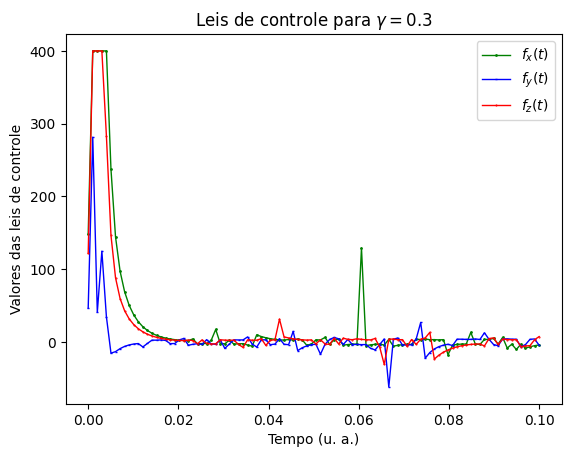

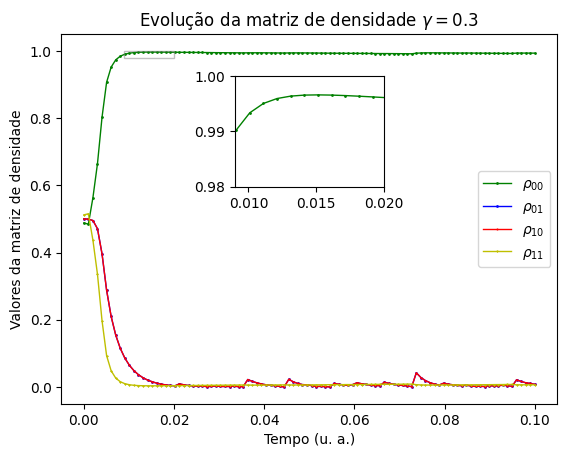

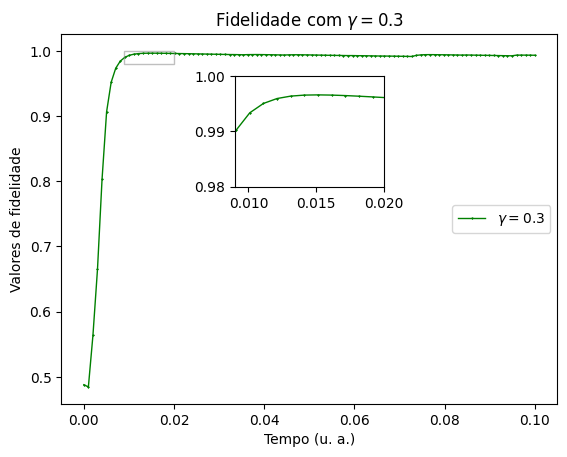

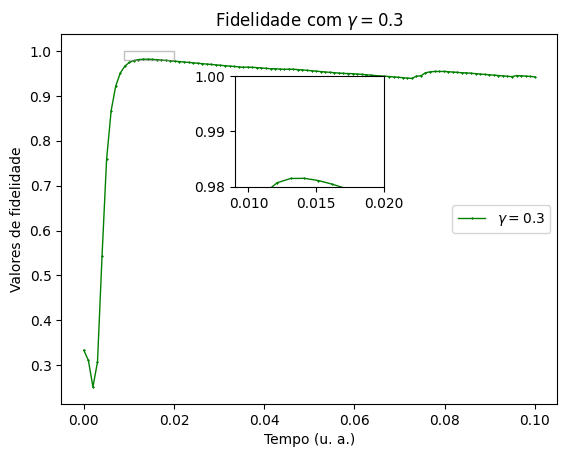

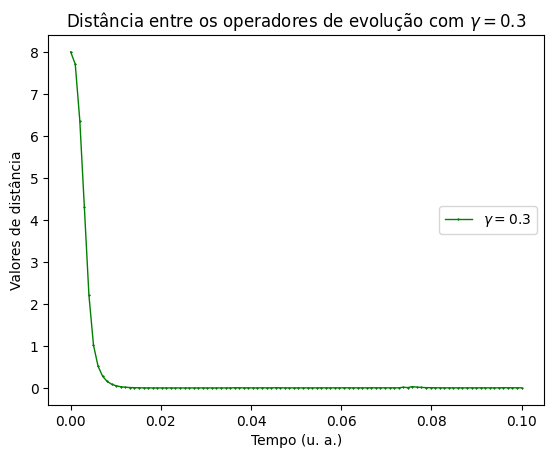

In [10]:
u = [70, 106, 66, 0.35, 0.31, 0.34] # Hadamard

Ut = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
Uf = [[0, 0, 1], [0, -1, 0], [1, 0, 0]] # Hadamard

print(f"############ Informações finais do experimento ############\n")

r0 = [[1], [0], [0]]
rf = np.dot(Uf, r0)
print(f'O rf desejado é:\n {rf}')
pf = [[1/2*(1+rf[2][0]), 1/2*(rf[0][0]-1j*rf[1][0])], [1/2*(rf[0][0]+1j*rf[1][0]), 1/2*(1-rf[2][0])]]
print(f'O rho desejado é: {pf}')

h=0.001
t=0
i=0
lbda=0.3
distance_vector = []
fx_vector = []
fy_vector = []
fz_vector = []
rho_vector = np.zeros((4,100),dtype=np.complex_)
fid_vector = []
fid_autores = []
   
while t < 100:
    a,b,c,Ut = rungeKutta(u, Ut, Uf, h, t, lbda)
    D = np.linalg.norm(Ut-Uf)**2
    distance_vector.append(D)
    fx_vector.append(a)
    fy_vector.append(b)
    fz_vector.append(c)
    rt = np.dot(Ut, r0)
    pt = [[1/2*(1+rt[2][0]), 1/2*(rt[0][0]-1j*rt[1][0])], [1/2*(rt[0][0]+1j*rt[1][0]), 1/2*(1-rt[2][0])]]
    rho_vector[0][t] = pt[0][0]
    rho_vector[1][t] = pt[0][1]
    rho_vector[2][t] = pt[1][0]
    rho_vector[3][t] = pt[1][1]
    fid_vector.append(np.trace(np.sqrt(np.sqrt(pt)*pf*np.sqrt(pt)))**2)
    fid_autores.append((np.trace(np.dot(Ut, np.transpose(Ut)))+np.abs(np.trace(np.dot(np.transpose(Uf), Ut)))**2)/(3*(3+1)))
    t += 1

rt = np.dot(Ut, r0)
print(f'O vetor de Bloch encontrado é:\n {rt}')
pt = [[1/2*(1+rt[2][0]), 1/2*(rt[0][0]-1j*rt[1][0])], [1/2*(rt[0][0]+1j*rt[1][0]), 1/2*(1-rt[2][0])]]
print(f'O rho alcançado foi:\n {pt}')
print(f'A fidelidade do experimento é de: {np.trace(np.sqrt(np.sqrt(pt)*pf*np.sqrt(pt)))}')
print(f'A fidelidade do experimento é de (fórmula dos autores do artigo): {(np.trace(np.dot(Ut, np.transpose(Ut)))+np.abs(np.trace(np.dot(np.transpose(Uf), Ut)))**2)/(3*(3+1))}')
print(f'O vetor U alcançado foi:\n {Ut}')
print(f'A distância encontrada, ao final do experimento foi: {D}')

print(f"\n############ Informações gráficas obtidas com o experimento ############\n")

leis_controle(fx_vector,fy_vector,fz_vector,t,lbda)
densidade(rho_vector,t,lbda)
fidelidade(fid_vector,t,lbda)
fidelidade(fid_autores,t,lbda)
distance(distance_vector,t,lbda)

In [11]:
print(f"\n############ Informações provenientes de análises gráficas ############\n")

time = 0
for i in range(len(rho_vector[0])):
    if rho_vector[0][i] == max(abs(rho_vector[0])):
        time = i
        break
print(fr"O maior valor obtido para ρ, na primeira posição da matriz, foi {max(abs(rho_vector[0]))} para o tempo de {time/1000}, com fidelidade de {np.abs(fid_vector[time])} e de acordo com a fórmula dos autores, com fidelidade de {np.abs(fid_autores[time])}")


############ Informações provenientes de análises gráficas ############

O maior valor obtido para ρ, na primeira posição da matriz, foi 0.9965556323505228 para o tempo de 0.015, com fidelidade de 0.9965556323505228 e de acordo com a fórmula dos autores, com fidelidade de 0.981111707978023


In [12]:
print(fid_autores)

[0.33364866087524536, 0.3108675351380726, 0.25178058094776606, 0.30729386136608533, 0.5434378722863923, 0.7587065492033139, 0.8669393596822271, 0.9217759024697493, 0.9506328805212091, 0.9661087243753679, 0.974383850561585, 0.9786714359211937, 0.9807113262557733, 0.98147541091231, 0.981503648382161, 0.981111707978023, 0.9804725323090895, 0.9796955588258912, 0.9788358987230018, 0.9779329834323338, 0.9770009666611245, 0.9762552167127412, 0.9753662720610833, 0.9744356782408156, 0.9734904472617013, 0.9725562948759898, 0.9716234951240249, 0.9706761615297914, 0.9698116522934989, 0.9689033144263176, 0.9679722429723947, 0.9670377174389783, 0.9660960886621561, 0.9653649563734353, 0.9644319783869585, 0.9636282574095242, 0.9638726625200157, 0.9633694154484728, 0.962834223382016, 0.9620421537911014, 0.9611849826919521, 0.9603017006949536, 0.9603699638488514, 0.9596681104392059, 0.9588678165136755, 0.9595022788024462, 0.9591160906419112, 0.9584243600670911, 0.9575938293975409, 0.9567519574034197, 0.

In [13]:
print(fid_vector)

[(0.48796675628067904+0j), (0.484597082119311+0j), (0.5635525206315448+0j), (0.6649286706061999+0j), (0.8030031167436973+0j), (0.906578044411519+0j), (0.951861243382891+0j), (0.9733861971499816+0j), (0.9843651781764992+0j), (0.9901860268670193+0j), (0.9933235562378948+0j), (0.9950113705291291+0j), (0.9959003563939947+0j), (0.9963337935916134+0j), (0.9965166139755437+0j), (0.9965556323505228+0j), (0.9965166560639793+0j), (0.9964309777549163+0j), (0.9963168051255294+0j), (0.9961879556146415+0j), (0.9960507894399836+0j), (0.9959524259557045+0j), (0.995849862375975+0j), (0.9957221928348141+0j), (0.9955857381250619+0j), (0.9954455432830036+0j), (0.9953106612369884+0j), (0.9951715017836977+0j), (0.9950251765772771+0j), (0.994880903916511+0j), (0.9947422073832349+0j), (0.9946004674899319+0j), (0.9944584765691948+0j), (0.9943968377461972+0j), (0.9942587628343007+0j), (0.9941132410657825+0j), (0.9943206836605833+0j), (0.9943970906487606+0j), (0.9944407495078089+0j), (0.9943649877981159+0j), (0.

In [14]:
print(distance_vector)

[8.003783389458603, 7.711119348092739, 6.369376037000274, 4.302960783135064, 2.2122903627675843, 1.023057190926291, 0.5201317760417402, 0.2799837301877741, 0.15558715505457865, 0.08806340476800081, 0.05040500595196879, 0.029069771041938145, 0.01687286621908019, 0.009870770310801386, 0.005836991692774182, 0.003519893754017072, 0.0021757222795209855, 0.0014139891610855343, 0.0009841642856301591, 0.0007501763174184282, 0.000629919381756684, 0.0010631877452032935, 0.0007537409768748847, 0.0006484244518065227, 0.0006291594932008714, 0.0007169684859650625, 0.000774050308029561, 0.0007546229984220416, 0.001118623322539689, 0.0010248065797335136, 0.0009624011070235748, 0.0009603784322129219, 0.000978062733239678, 0.0011308357013696015, 0.0010926377259023907, 0.00125273317583108, 0.005354752470156692, 0.003542841240807236, 0.002601903619481545, 0.002016402394981923, 0.0017210034477179107, 0.0015849257887112634, 0.0036972604957128453, 0.002750160159913763, 0.0022193855395978923, 0.00551952220646

In [15]:
print(min(distance_vector))

0.0006291594932008714


In [16]:
print(max(fid_autores))

0.981503648382161
